# Phase 1

In [1]:
import pandas as pd 
import numpy as np

In [2]:
dcc = pd.read_csv('TBN_CC_APPLY.csv')
dfx = pd.read_csv('TBN_FX_TXN.csv')
dln = pd.read_csv('TBN_LN_APPLY.csv')
dwm = pd.read_csv('TBN_WM_TXN.csv')
behav = pd.read_csv('work finish data/cust_behavior.csv')


cif =pd.read_csv('TBN_CIF.csv')
answer=pd.read_csv('TBN_Y_ZERO.csv')

In [3]:
behav.shape

(195000, 5)

In [4]:
len(pd.unique(behav.iloc[:,0]))

195000

In [5]:
cif.head()

,CUST_NO,AGE,CHILDREN_CNT,CUST_START_DT,EDU_CODE,GENDER_CODE,INCOME_RANGE_CODE,WORK_MTHS
0,UFUIMEGMK2KTIWI4,1,NaN,2.0,NaN,NaN,NaN,NaN
1,3HJN2X_LGBHBKILI,3,0.0,9393.0,NaN,NaN,1.0,NaN
2,MNEZK2O3OE-JHYBW,4,0.0,2912.0,3.0,M,2.0,2.0
3,W7ADZSWYXEMHB7JQ,4,0.0,8332.0,5.0,M,2.0,1.0
4,ODB6BA6ORHL2UYZE,4,0.0,744.0,3.0,M,2.0,1.0


In [6]:
cif_arr=[]
for i in cif.iloc[:,0]:
    cif_arr.append(i)


In [7]:
# 比對答案卷裡面的資料，看有沒有缺的，有缺的就補上去，所以會有146消失的資料被補進去 (optional)
answer=pd.read_csv('TBN_Y_ZERO.csv')
for i in answer.iloc[:,0]:
    if i not in cif_arr:
        cif=cif.append({'CUST_NO':i},ignore_index=True)

cif.tail(10)

,CUST_NO,AGE,CHILDREN_CNT,CUST_START_DT,EDU_CODE,GENDER_CODE,INCOME_RANGE_CODE,WORK_MTHS
187815,28XTW0QU6KSSLQ7O,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187816,CDPXJP3KOUURZPI0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187817,9HTHF1ZLFAC4UIF4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187818,OBKCWNDIACIIH67A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187819,CQVKAL3ZGPLULWTK,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187820,KCM193NPIS5SMAEY,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187821,ZSILFFO-HJUZSJQC,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187822,9Q9QBAA3VUAK8SBQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187823,4DFNV0HJDHEUADFA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187824,JME4GMNUWSIDENMG,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
cif.shape

(187825, 8)

In [9]:
cif_c= cif.set_index('CUST_NO').join(behav.set_index('ID'),how='left')

In [10]:
cif_c = cif_c.rename(columns={'CreditCard':'CreditCard_b','ForEx':'ForEx_b','Trust':'Trust_b','Loan':'Loan_b'})

In [11]:
# count buy how many times of credit card
cc_g=dcc.groupby(['CUST_NO']).count()
cc_g = cc_g.rename(columns={'TXN_DT':'cc_BuyFreq'})

In [12]:
fx=dfx.drop(columns=['FX_TXN_AMT'])
fx_g=fx.groupby(['CUST_NO']).count()
fx_g = fx_g.rename(columns={'TXN_DT':'fx_BuyFreq'})

In [13]:
ln=dln.drop(columns=['LN_AMT','LN_USE'])
ln_g=ln.groupby(['CUST_NO']).count()
ln_g = ln_g.rename(columns={'TXN_DT':'ln_BuyFreq'})

In [14]:
wm=dwm.drop(columns=['CUST_RISK_CODE','INVEST_TYPE_CODE','WM_TXN_AMT'])
wm_g=wm.groupby(['CUST_NO']).count()
wm_g = wm_g.rename(columns={'TXN_DT':'wm_BuyFreq'})

In [15]:
cif_c= cif_c.join(cc_g,how='left')
cif_c= cif_c.join(fx_g,how='left')
cif_c= cif_c.join(ln_g,how='left')
cif_c= cif_c.join(wm_g,how='left')

In [16]:
cif_c=cif_c.fillna({'cc_BuyFreq':0,'fx_BuyFreq':0,'ln_BuyFreq':0,'wm_BuyFreq':0})
cif_c=cif_c.fillna({'CreditCard_b':0,'ForEx_b':0,'Trust_b':0,'Loan_b':0})

In [17]:
cif_c.shape

(187825, 15)

In [18]:
cif_c.head()

,AGE,CHILDREN_CNT,CUST_START_DT,EDU_CODE,GENDER_CODE,INCOME_RANGE_CODE,WORK_MTHS,CreditCard_b,ForEx_b,Trust_b,Loan_b,cc_BuyFreq,fx_BuyFreq,ln_BuyFreq,wm_BuyFreq
CUST_NO,,,,,,,,,,,,,,,
UFUIMEGMK2KTIWI4,1.0,NaN,2.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3HJN2X_LGBHBKILI,3.0,0.0,9393.0,NaN,NaN,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MNEZK2O3OE-JHYBW,4.0,0.0,2912.0,3.0,M,2.0,2.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0
W7ADZSWYXEMHB7JQ,4.0,0.0,8332.0,5.0,M,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ODB6BA6ORHL2UYZE,4.0,0.0,744.0,3.0,M,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
cif_c.to_csv('work finish data/cif_combine_browse.csv')

In [20]:
cif_c=pd.read_csv('work finish data/cif_combine_browse.csv')

In [21]:
cif_c.head()

,CUST_NO,AGE,CHILDREN_CNT,CUST_START_DT,EDU_CODE,GENDER_CODE,INCOME_RANGE_CODE,WORK_MTHS,CreditCard_b,ForEx_b,Trust_b,Loan_b,cc_BuyFreq,fx_BuyFreq,ln_BuyFreq,wm_BuyFreq
0,UFUIMEGMK2KTIWI4,1.0,NaN,2.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3HJN2X_LGBHBKILI,3.0,0.0,9393.0,NaN,NaN,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,MNEZK2O3OE-JHYBW,4.0,0.0,2912.0,3.0,M,2.0,2.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0
3,W7ADZSWYXEMHB7JQ,4.0,0.0,8332.0,5.0,M,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ODB6BA6ORHL2UYZE,4.0,0.0,744.0,3.0,M,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
# sex -> male = 1 & female = 0
cif_c.loc[cif_c['GENDER_CODE'] =='M', 'GENDER_CODE'] = 1
cif_c.loc[cif_c['GENDER_CODE'] =='F', 'GENDER_CODE'] = 0

In [23]:
ans_arr=[] # 在答案卷裡面的 id

for i in answer.iloc[:,0]:
    ans_arr.append(i)

In [24]:
# 把 3W筆資料取出來 分成 3W 和 剩下
answer_arr=[]
rest_arr=[]

for index,row in cif_c.iterrows():
    if row.values[0] in ans_arr:
        answer_arr.append(index)
    else :
        rest_arr.append(index)

In [25]:
cif_ans= cif_c.iloc[answer_arr,:]
cif_rest=cif_c.iloc[rest_arr,:]

In [26]:
cif_ans.shape

(30000, 16)

In [27]:
cif_rest.shape

(157825, 16)

In [28]:
cif_rest=cif_rest.dropna()
cif_rest.shape

(127312, 16)

In [29]:
cif_rest.to_csv('work finish data/cif_combine_browse_rest.csv')
cif_ans.to_csv('work finish data/cif_combine_browse_answer.csv')

# Phase 2

In [30]:
# checkpoint

cif_rest=pd.read_csv('work finish data/cif_combine_browse_rest.csv')
cif_ans = pd.read_csv('work finish data/cif_combine_browse_answer.csv')

In [31]:
cif_rest=cif_rest.drop('Unnamed: 0',axis=1)

In [32]:
cif_rest.tail()

,CUST_NO,AGE,CHILDREN_CNT,CUST_START_DT,EDU_CODE,GENDER_CODE,INCOME_RANGE_CODE,WORK_MTHS,CreditCard_b,ForEx_b,Trust_b,Loan_b,cc_BuyFreq,fx_BuyFreq,ln_BuyFreq,wm_BuyFreq
127307,HXNFLTI61KOEISY0,4.0,0.0,9479.0,5.0,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
127308,VKMMLU1MTBDTQBYY,1.0,0.0,8329.0,5.0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127309,QIUZ-GXIFLEUTO4E,2.0,0.0,8168.0,3.0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127310,13JSL0TJAMWS4UHK,3.0,0.0,7989.0,3.0,0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,7.0
127311,SED1QHMCZKIWCZSU,1.0,0.0,9550.0,5.0,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [33]:
cif_ans=cif_ans.drop('Unnamed: 0',axis=1)
cif_ans.tail()

,CUST_NO,AGE,CHILDREN_CNT,CUST_START_DT,EDU_CODE,GENDER_CODE,INCOME_RANGE_CODE,WORK_MTHS,CreditCard_b,ForEx_b,Trust_b,Loan_b,cc_BuyFreq,fx_BuyFreq,ln_BuyFreq,wm_BuyFreq
29995,KCM193NPIS5SMAEY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
29996,ZSILFFO-HJUZSJQC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0
29997,9Q9QBAA3VUAK8SBQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29998,4DFNV0HJDHEUADFA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29999,JME4GMNUWSIDENMG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
cif_rest.to_csv('work finish data/cif_combine_browse_rest.csv',index=False)
cif_ans.to_csv('work finish data/cif_combine_browse_answer.csv',index=False)

# Phase 3

In [35]:
cif_rest=pd.read_csv('work finish data/cif_combine_browse_rest.csv',index_col=0)
cif_ans = pd.read_csv('work finish data/cif_combine_browse_answer.csv',index_col=0)

In [36]:
cif_rest.head()

,AGE,CHILDREN_CNT,CUST_START_DT,EDU_CODE,GENDER_CODE,INCOME_RANGE_CODE,WORK_MTHS,CreditCard_b,ForEx_b,Trust_b,Loan_b,cc_BuyFreq,fx_BuyFreq,ln_BuyFreq,wm_BuyFreq
CUST_NO,,,,,,,,,,,,,,,
MNEZK2O3OE-JHYBW,4.0,0.0,2912.0,3.0,1,2.0,2.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0
W7ADZSWYXEMHB7JQ,4.0,0.0,8332.0,5.0,1,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ODB6BA6ORHL2UYZE,4.0,0.0,744.0,3.0,1,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SURN2CDMNHCL4SJC,4.0,0.0,4677.0,2.0,1,2.0,1.0,1.0,23.0,0.0,1.0,0.0,17.0,0.0,0.0
1SMBYIP5SSUNG1DW,4.0,0.0,7936.0,6.0,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
#使用一組的分群情形
x = cif_rest.values
#進行標準化讓該欄位的數值能讓數值變小
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(x)

In [38]:
from sklearn.cluster import KMeans
#設定k的數值
max_k = 10
#建立sum_distance 樣本數的空串列
sum_distance = []
for k in range(1,max_k+1):
    #迴圈顯示各個分群樣本數下降的情形 找出最適合的分群點k
    km = KMeans(n_clusters=k)
    km.fit(x)
    sum_distance.append(km.inertia_)

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(list(range(1,max_k+1)),sum_distance,'-o')
plt.ylabel('sum of distance')
plt.xlabel('k')

Text(0.5, 0, 'k')

In [40]:
from fancyimpute import KNN

In [41]:
cif_ans.head()

,AGE,CHILDREN_CNT,CUST_START_DT,EDU_CODE,GENDER_CODE,INCOME_RANGE_CODE,WORK_MTHS,CreditCard_b,ForEx_b,Trust_b,Loan_b,cc_BuyFreq,fx_BuyFreq,ln_BuyFreq,wm_BuyFreq
CUST_NO,,,,,,,,,,,,,,,
OGMWH3NPW4BKLRBU,4.0,0.0,5418.0,3.0,1.0,2.0,1.0,26.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
THE2EIIGHAUUINDO,4.0,0.0,5903.0,3.0,0.0,1.0,1.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
N-_SFRR3-YRF2HRO,1.0,0.0,9221.0,6.0,1.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
QI0VWKJE-M5EPDAO,2.0,0.0,8843.0,NaN,1.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PWD6W0QA58T8GFLI,4.0,0.0,7048.0,4.0,1.0,2.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0


In [42]:
# 這個跑超級久 用 KNN 來找missing value
no_nan_cif=KNN(k=5).complete(cif_ans)

cif_new=np.trunc(no_nan_cif)

Imputing row 1/30000 with 0 missing, elapsed time: 221.538
Imputing row 101/30000 with 0 missing, elapsed time: 221.549
Imputing row 201/30000 with 0 missing, elapsed time: 221.559
Imputing row 301/30000 with 0 missing, elapsed time: 221.572
Imputing row 401/30000 with 0 missing, elapsed time: 221.582
Imputing row 501/30000 with 2 missing, elapsed time: 221.594
Imputing row 601/30000 with 0 missing, elapsed time: 221.604
Imputing row 701/30000 with 0 missing, elapsed time: 221.609
Imputing row 801/30000 with 0 missing, elapsed time: 221.616
Imputing row 901/30000 with 0 missing, elapsed time: 221.624
Imputing row 1001/30000 with 0 missing, elapsed time: 221.631
Imputing row 1101/30000 with 0 missing, elapsed time: 221.634
Imputing row 1201/30000 with 0 missing, elapsed time: 221.641
Imputing row 1301/30000 with 0 missing, elapsed time: 221.647
Imputing row 1401/30000 with 1 missing, elapsed time: 221.655
Imputing row 1501/30000 with 3 missing, elapsed time: 221.669
Imputing row 1601/30

Imputing row 15401/30000 with 0 missing, elapsed time: 222.368
Imputing row 15501/30000 with 0 missing, elapsed time: 222.374
Imputing row 15601/30000 with 0 missing, elapsed time: 222.388
Imputing row 15701/30000 with 0 missing, elapsed time: 222.393
Imputing row 15801/30000 with 0 missing, elapsed time: 222.398
Imputing row 15901/30000 with 0 missing, elapsed time: 222.405
Imputing row 16001/30000 with 1 missing, elapsed time: 222.414
Imputing row 16101/30000 with 0 missing, elapsed time: 222.425
Imputing row 16201/30000 with 0 missing, elapsed time: 222.431
Imputing row 16301/30000 with 0 missing, elapsed time: 222.438
Imputing row 16401/30000 with 0 missing, elapsed time: 222.449
Imputing row 16501/30000 with 2 missing, elapsed time: 222.457
Imputing row 16601/30000 with 0 missing, elapsed time: 222.466
Imputing row 16701/30000 with 0 missing, elapsed time: 222.472
Imputing row 16801/30000 with 2 missing, elapsed time: 222.479
Imputing row 16901/30000 with 0 missing, elapsed time: 

Imputing row 29201/30000 with 1 missing, elapsed time: 223.860
Imputing row 29301/30000 with 2 missing, elapsed time: 223.898
Imputing row 29401/30000 with 1 missing, elapsed time: 223.948
Imputing row 29501/30000 with 3 missing, elapsed time: 224.009
Imputing row 29601/30000 with 3 missing, elapsed time: 224.076
Imputing row 29701/30000 with 0 missing, elapsed time: 224.119
Imputing row 29801/30000 with 2 missing, elapsed time: 224.155
Imputing row 29901/30000 with 7 missing, elapsed time: 224.229


In [43]:
df_cif=pd.DataFrame(cif_new,columns=['AGE','CHILDREN_CNT','CUST_START_DT','EDU_CODE','GENDER_CODE',
                          'INCOME_RANGE_CODE','WORK_MTHS','CreditCard_b','ForEx_b',
                          'Trust_b','Loan_b','cc_BuyFreq','fx_BuyFreq','ln_BuyFreq','wm_BuyFreq',])

In [46]:
df_cif=df_cif.assign(CUST_NO=cif_ans.index).set_index('CUST_NO')

df_cif.head()

,AGE,CHILDREN_CNT,CUST_START_DT,EDU_CODE,GENDER_CODE,INCOME_RANGE_CODE,WORK_MTHS,CreditCard_b,ForEx_b,Trust_b,Loan_b,cc_BuyFreq,fx_BuyFreq,ln_BuyFreq,wm_BuyFreq
CUST_NO,,,,,,,,,,,,,,,
OGMWH3NPW4BKLRBU,4.0,0.0,5418.0,3.0,1.0,2.0,1.0,26.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
THE2EIIGHAUUINDO,4.0,0.0,5903.0,3.0,0.0,1.0,1.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
N-_SFRR3-YRF2HRO,1.0,0.0,9221.0,6.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
QI0VWKJE-M5EPDAO,2.0,0.0,8843.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PWD6W0QA58T8GFLI,4.0,0.0,7048.0,4.0,1.0,2.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0


In [48]:
df_cif.shape

(30000, 15)

In [50]:
df_cif.tail()

,AGE,CHILDREN_CNT,CUST_START_DT,EDU_CODE,GENDER_CODE,INCOME_RANGE_CODE,WORK_MTHS,CreditCard_b,ForEx_b,Trust_b,Loan_b,cc_BuyFreq,fx_BuyFreq,ln_BuyFreq,wm_BuyFreq
CUST_NO,,,,,,,,,,,,,,,
KCM193NPIS5SMAEY,2.0,0.0,6145.0,3.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
ZSILFFO-HJUZSJQC,2.0,0.0,6367.0,4.0,0.0,1.0,1.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0
9Q9QBAA3VUAK8SBQ,3.0,0.0,4728.0,3.0,0.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4DFNV0HJDHEUADFA,2.0,0.0,6585.0,4.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
JME4GMNUWSIDENMG,3.0,0.0,5530.0,3.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
# Checkpoint
df_cif.to_csv('work finish data/cif_combine_browse_answer.csv')

# Phase 4


In [116]:
cif_rest=pd.read_csv('work finish data/cif_combine_browse_rest.csv')
cif_ans = pd.read_csv('work finish data/cif_combine_browse_answer.csv')

In [117]:
cif_rest.shape

(127312, 16)

In [118]:
cif_ans.shape

(30000, 16)

In [119]:
df=pd.concat([cif_rest,cif_ans])
df.shape

(157312, 16)

In [120]:
df.head()

,CUST_NO,AGE,CHILDREN_CNT,CUST_START_DT,EDU_CODE,GENDER_CODE,INCOME_RANGE_CODE,WORK_MTHS,CreditCard_b,ForEx_b,Trust_b,Loan_b,cc_BuyFreq,fx_BuyFreq,ln_BuyFreq,wm_BuyFreq
0,MNEZK2O3OE-JHYBW,4.0,0.0,2912.0,3.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0
1,W7ADZSWYXEMHB7JQ,4.0,0.0,8332.0,5.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ODB6BA6ORHL2UYZE,4.0,0.0,744.0,3.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SURN2CDMNHCL4SJC,4.0,0.0,4677.0,2.0,1.0,2.0,1.0,1.0,23.0,0.0,1.0,0.0,17.0,0.0,0.0
4,1SMBYIP5SSUNG1DW,4.0,0.0,7936.0,6.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [121]:
#新增特徵值 增加feature
df=df.assign(browse_c=(df['CreditCard_b']+df['ForEx_b']+df['Trust_b']+df['Loan_b']))
df=df.assign(freq_c=(df['cc_BuyFreq']+df['fx_BuyFreq']+df['ln_BuyFreq']+df['wm_BuyFreq']))

In [122]:
df.loc[df['GENDER_CODE'] ==0, 'GENDER_CODE'] = 'Male'
df.loc[df['GENDER_CODE'] ==1, 'GENDER_CODE'] = 'Female'

In [123]:
df.head()

,CUST_NO,AGE,CHILDREN_CNT,CUST_START_DT,EDU_CODE,GENDER_CODE,INCOME_RANGE_CODE,WORK_MTHS,CreditCard_b,ForEx_b,Trust_b,Loan_b,cc_BuyFreq,fx_BuyFreq,ln_BuyFreq,wm_BuyFreq,browse_c,freq_c
0,MNEZK2O3OE-JHYBW,4.0,0.0,2912.0,3.0,Female,2.0,2.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,14.0
1,W7ADZSWYXEMHB7JQ,4.0,0.0,8332.0,5.0,Female,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ODB6BA6ORHL2UYZE,4.0,0.0,744.0,3.0,Female,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SURN2CDMNHCL4SJC,4.0,0.0,4677.0,2.0,Female,2.0,1.0,1.0,23.0,0.0,1.0,0.0,17.0,0.0,0.0,25.0,17.0
4,1SMBYIP5SSUNG1DW,4.0,0.0,7936.0,6.0,Female,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
df2 = pd.get_dummies(df['GENDER_CODE'])
df2.head()

,Female,Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [125]:
#df.join合併資料
df=df.assign(female=df2['Female'],male=df2['Male'])
df.head()

,CUST_NO,AGE,CHILDREN_CNT,CUST_START_DT,EDU_CODE,GENDER_CODE,INCOME_RANGE_CODE,WORK_MTHS,CreditCard_b,ForEx_b,Trust_b,Loan_b,cc_BuyFreq,fx_BuyFreq,ln_BuyFreq,wm_BuyFreq,browse_c,freq_c,female,male
0,MNEZK2O3OE-JHYBW,4.0,0.0,2912.0,3.0,Female,2.0,2.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,14.0,1,0
1,W7ADZSWYXEMHB7JQ,4.0,0.0,8332.0,5.0,Female,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
2,ODB6BA6ORHL2UYZE,4.0,0.0,744.0,3.0,Female,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
3,SURN2CDMNHCL4SJC,4.0,0.0,4677.0,2.0,Female,2.0,1.0,1.0,23.0,0.0,1.0,0.0,17.0,0.0,0.0,25.0,17.0,1,0
4,1SMBYIP5SSUNG1DW,4.0,0.0,7936.0,6.0,Female,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0


In [126]:
#變成有買或是沒買 (optional)
df.loc[df['cc_BuyFreq']>0,'cc_BuyFreq']=1
df.loc[df['fx_BuyFreq']>0,'fx_BuyFreq']=1
df.loc[df['ln_BuyFreq']>0,'ln_BuyFreq']=1
df.loc[df['wm_BuyFreq']>0,'wm_BuyFreq']=1

In [127]:
#新增一個欄位 收入級距 / (小孩數+監護人)
df=df.assign(avg_income=(df['INCOME_RANGE_CODE']/(df['CHILDREN_CNT']+1)))

In [129]:
# 教育層  高中以上 = 1 高中以下 = 0
df.loc[df['EDU_CODE']<=3,'edu_cut'] =0
df.loc[df['EDU_CODE']>3,'edu_cut']=1 

# 切實際年齡 
df = df.assign(current_age=(round(abs(df['CUST_START_DT']-9447)/365)+df['AGE']*15))

# 擁有資產 
df = df.assign(assets = df['INCOME_RANGE_CODE']*df['WORK_MTHS'])

df.head()


,CUST_NO,AGE,CHILDREN_CNT,CUST_START_DT,EDU_CODE,GENDER_CODE,INCOME_RANGE_CODE,WORK_MTHS,CreditCard_b,ForEx_b,...,ln_BuyFreq,wm_BuyFreq,browse_c,freq_c,female,male,avg_income,edu_cut,current_age,assets
0,MNEZK2O3OE-JHYBW,4.0,0.0,2912.0,3.0,Female,2.0,2.0,0.0,0.0,...,0.0,0.0,0.0,14.0,1,0,2.0,0.0,78.0,4.0
1,W7ADZSWYXEMHB7JQ,4.0,0.0,8332.0,5.0,Female,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,0,2.0,1.0,63.0,2.0
2,ODB6BA6ORHL2UYZE,4.0,0.0,744.0,3.0,Female,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,0,2.0,0.0,84.0,2.0
3,SURN2CDMNHCL4SJC,4.0,0.0,4677.0,2.0,Female,2.0,1.0,1.0,23.0,...,0.0,0.0,25.0,17.0,1,0,2.0,0.0,73.0,2.0
4,1SMBYIP5SSUNG1DW,4.0,0.0,7936.0,6.0,Female,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,0,1.0,1.0,64.0,1.0


In [130]:
# 利用梯度提升樹找到重要特徵，然後合併成新的特徵
df=df.assign(freq_c_CUST_START_DT=(df['CUST_START_DT']+df['freq_c']))

In [131]:
df.head()

,CUST_NO,AGE,CHILDREN_CNT,CUST_START_DT,EDU_CODE,GENDER_CODE,INCOME_RANGE_CODE,WORK_MTHS,CreditCard_b,ForEx_b,...,wm_BuyFreq,browse_c,freq_c,female,male,avg_income,edu_cut,current_age,assets,freq_c_CUST_START_DT
0,MNEZK2O3OE-JHYBW,4.0,0.0,2912.0,3.0,Female,2.0,2.0,0.0,0.0,...,0.0,0.0,14.0,1,0,2.0,0.0,78.0,4.0,2926.0
1,W7ADZSWYXEMHB7JQ,4.0,0.0,8332.0,5.0,Female,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1,0,2.0,1.0,63.0,2.0,8332.0
2,ODB6BA6ORHL2UYZE,4.0,0.0,744.0,3.0,Female,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1,0,2.0,0.0,84.0,2.0,744.0
3,SURN2CDMNHCL4SJC,4.0,0.0,4677.0,2.0,Female,2.0,1.0,1.0,23.0,...,0.0,25.0,17.0,1,0,2.0,0.0,73.0,2.0,4694.0
4,1SMBYIP5SSUNG1DW,4.0,0.0,7936.0,6.0,Female,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1,0,1.0,1.0,64.0,1.0,7936.0


In [134]:
df.to_csv('work finish data/cif_combine_browse.csv')

In [ ]:
# #為了使用梯度提升樹將4個模型的預測值刪除來建模找尋特徵重要度
# train_cc_Y = df['cc_BuyFreq']
# train_fx_Y = df['fx_BuyFreq']
# train_ln_Y = df['ln_BuyFreq']
# train_wm_Y = df['wm_BuyFreq']
# df = df.drop(['GENDER_CODE','cc_BuyFreq', 'fx_BuyFreq','ln_BuyFreq','wm_BuyFreq'] , axis=1)

In [ ]:
# #利用GradientBoostingClassifier() 觀察特徵排序
# # 梯度提升樹擬合後, 將結果依照重要性由高到低排序 (note : D27作業中'Ticket'是第一名特徵, 'Age'是數值特徵中排名最高者)
# from sklearn.ensemble import GradientBoostingClassifier
# estimator = GradientBoostingClassifier()
# estimator.fit(df.values, train_cc_Y)
# feats = pd.Series(data=estimator.feature_importances_, index=df.columns)
# feats = feats.sort_values(ascending=False)
# feats

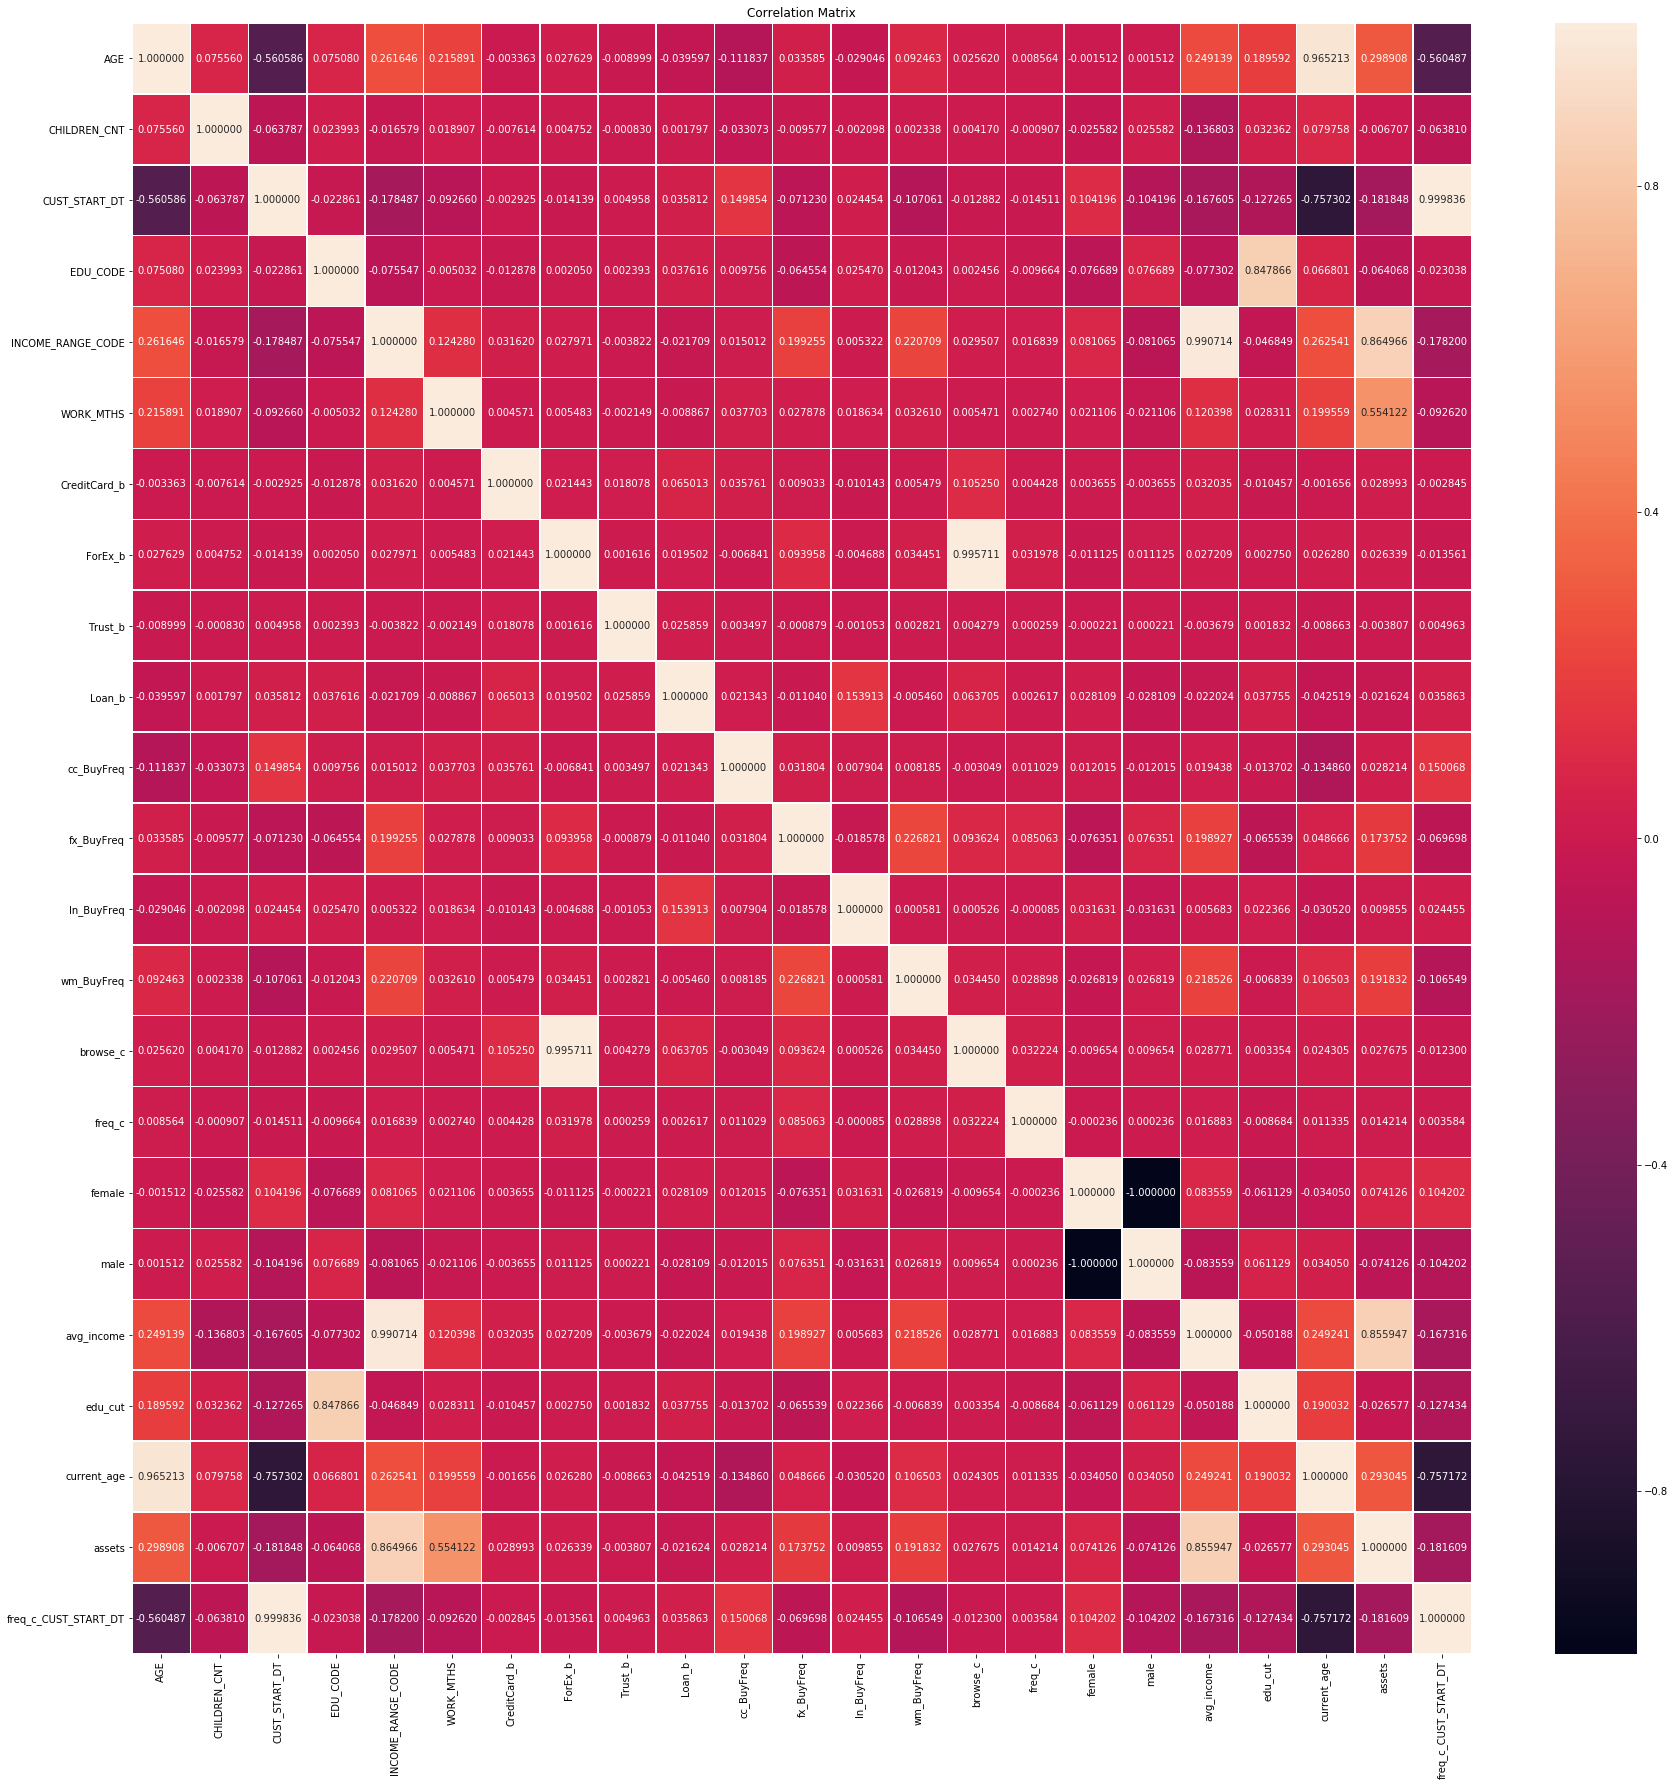

In [133]:
fig2,ax2=plt.subplots(figsize=(30,30))
ax2.set_title('Correlation Matrix')
sns.heatmap(df.corr(),annot=True,linewidths=.5,fmt='.6f',ax=ax2)